#Семинар 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x_axis = np.array([0, 0.18078584, 9.325226599, 17.09628721, 4.69820241, 11.575229305, 11.31769349, 14.63378951]) # координаты деревень по оси x
y_axis = np.array([0, 7.03050245, 9.06193657, 0.1718145, 5.1383203, 0.11069032, 3.27703365, 5.36870287]) # координаты деревень по оси y
shipments = np.array([5, 7, 4, 3 , 5, 2, 1, 1])  # англ. доставки, среднее количество еженедельных доставок в каждый город
village = ['Тетерье', 'Журавец', 'Корсунь', 'Березовка', 'Протасово', 'Трудки', 'Нижний туровец', 'Вышний туровец'] #англ. населённый пункт
data = pd.DataFrame({'x_coordinates_km': x_axis, 'y_coordinates_km': y_axis, 'deliveries': shipments}, index=village)

In [ ]:
data

,x_coordinates_km,y_coordinates_km,deliveries
Тетерье,0.000000,0.000000,5
Журавец,0.180786,7.030502,7
Корсунь,9.325227,9.061937,4
Березовка,17.096287,0.171815,3
Протасово,4.698202,5.138320,5
Трудки,11.575229,0.110690,2
Нижний туровец,11.317693,3.277034,1
Вышний туровец,14.633790,5.368703,1


In [ ]:
vectors = data[['x_coordinates_km', 'y_coordinates_km']].values
print(vectors)

[[ 0.          0.        ]
 [ 0.18078584  7.03050245]
 [ 9.3252266   9.06193657]
 [17.09628721  0.1718145 ]
 [ 4.69820241  5.1383203 ]
 [11.57522931  0.11069032]
 [11.31769349  3.27703365]
 [14.63378951  5.36870287]]


In [ ]:
vectors[:, 0]

array([ 0.        ,  0.18078584,  9.3252266 , 17.09628721,  4.69820241,
       11.57522931, 11.31769349, 14.63378951])

### Построение таблицы расстояний

1

In [ ]:
from scipy.spatial import distance_matrix

In [ ]:
distances = pd.DataFrame(distance_matrix(vectors, vectors), index=data.index, columns=data.index)
distances

,Тетерье,Журавец,Корсунь,Березовка,Протасово,Трудки,Нижний туровец,Вышний туровец
Тетерье,0.000000,7.032826,13.003021,17.097151,6.962431,11.575759,11.782578,15.587520
Журавец,7.032826,0.000000,9.367365,18.253103,4.897694,13.331059,11.752414,14.548226
Корсунь,13.003021,9.367365,0.000000,11.807779,6.066640,9.229698,6.118417,6.466902
Березовка,17.097151,18.253103,11.807779,0.000000,13.355848,5.521396,6.560071,5.750786
Протасово,6.962431,4.897694,6.066640,13.355848,0.000000,8.518836,6.876194,9.938258
Трудки,11.575759,13.331059,9.229698,5.521396,8.518836,0.000000,3.176799,6.082885
Нижний туровец,11.782578,11.752414,6.118417,6.560071,6.876194,3.176799,0.000000,3.920660
Вышний туровец,15.587520,14.548226,6.466902,5.750786,9.938258,6.082885,3.920660,0.000000


2

In [ ]:
shipping_in_week = (distances * 2) @ shipments

In [ ]:
shipping_in_week

Тетерье           475.734175
Журавец           409.688261
Корсунь           454.775814
Березовка         701.242973
Протасово         334.564477
Трудки            513.066101
Нижний туровец    459.977799
Вышний туровец    577.345732
dtype: float64

In [ ]:
shipping_in_week.idxmin()

'Протасово'

=> минимум в пункте Протасово

# Манхэттенское расстояние


или **расстояние городских кварталов** - сумма модулей разностей коорднат.

Расстояние между векторами a = (x1, y1) и b = (x2, y2):

**d1(a,b) = |x2 - x1| + |y2 - y1|**

Городские кварталы в Манхэттене имеют прямоугольную сетку, поэтому из а в б напрямую попасть нельзя

1

In [ ]:
def manhattan_distance(a, b):
  return np.abs(a-b).sum()

In [ ]:
A = [2, 4, 4, 6]
B = [5, 5, 7, 8]

manhattan_distance(np.array([2, 4, 4, 6]), np.array([5, 5, 7, 8]))

9

Из трех свободных такси найдите ближайшее в нужном районе Манхэттена


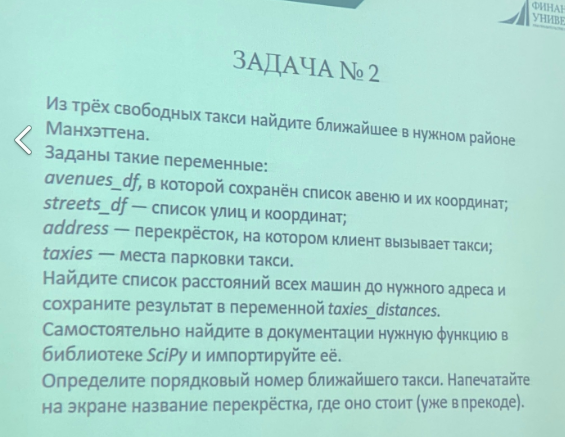

In [ ]:
from scipy.spatial import distance

In [ ]:
avenues_df = pd.DataFrame([0, 153, 307, 524], index=['Park', 'Lexington', '3rd', '2nd']) # Координаты авеню
streets_df = pd.DataFrame([0, 81, 159, 240, 324], index=['76', '75', '74', '73', '72']) # Координаты улиц
address = ['Lexington', '74']   # Адрес это пересечение авеню и улицы
                                # Адреса перекрестков на которых стоят такси
taxies = [
    ['Park', '72'],
    ['2nd', '75'],
    ['3rd', '76']
]

In [ ]:
taxies_distances = []
start = (avenues_df.loc[address[0]].values[0], streets_df.loc[address[1]].values[0],)

for taxi in taxies:
  taxi = (avenues_df.loc[taxi[0]].values[0], streets_df.loc[taxi[1]].values[0])
  taxies_distances.append(distance.cityblock(start, taxi))


In [ ]:
taxies_distances = np.array(taxies_distances)
print("Порядковый номер:", taxies_distances.argmin())
print("Перекресток:", taxies[taxies_distances.argmin()])

Порядковый номер: 2
Перекресток: ['3rd', '76']


#Семинар 2

Найти самый близкий к Москве пограничный субъект РФ

Перечень приграничных субъектов Российской Федерации:

In [ ]:
regions = {'Республика Карелия':(63.1558702, 32.9905552),
'Калининградская область': (54.710161, 20.510138),
'Ленинградская область': (60.0793208, 31.8926644),
'Мурманская область':(68.970663, 33.074914),
'Псковская область':(56.7708599, 29.094009),
'Белгородская область':(50.6107, 36.5802),
'Брянская область':(53.243561, 34.363428),
'Курская область':(51.730848, 36.193015),
'Смоленская область':(54.782634, 32.045288),
'Республика Калмыкия':(46.307743, 44.269759),
'Краснодарский край':(45.035470, 38.975313),
'Астраханская область':(46.347616, 48.030175),
'Волгоградская область':(48.707068, 44.516979),
'Республика Дагестан':(42.983103, 47.504748),
'Кабардино-Балкарская Республика':(43.485259, 43.607072),
'Карачаево-Черкесская Республика':(44.228376, 42.048277),
'Республика Ингушетия':(43.166786, 44.803574),
'Республика Северная Осетия-Алания':(43.024617, 44.681768),
'Чеченская республика':(43.318368, 45.692419),
'Оренбургская область':(51.768199, 55.096955),
'Самарская область':(53.195876, 50.100199),
'Саратовская область':(51.533561, 46.034265),
'Курганская область':(55.441005, 65.341122),
'Тюменская область':(57.152986, 65.541231),
'Челябинская область':(55.159897, 61.402554),
'Республика Алтай':(51.957805, 85.960631),
'Республика Тыва':(51.719891, 94.437986),
'Алтайский край':(53.346785, 83.776860),
'Новосибирская область':(55.030199, 82.920430),
'Омская область':(54.989342, 73.368212),
'Республика Бурятия':(51.834811, 107.584545),
'Забайкальский край':(52.033638, 113.501052),
'Приморский край':(43.115536, 131.885485),
'Хабаровский край':(48.480223, 135.071917),
'Амурская область':(50.290658, 127.527173),
'Чукотский автономный округ':(64.735815, 177.518911),
'Еврейская автономная область':(48.789917, 132.924750),
'Херсонская область':(46.640322, 32.614963),
'Запорожская область':(47.838309, 35.138848),
'Донецкая Народная Республика':(48.015877, 37.802850),
'Луганская Народная Республика':(48.573896, 39.307699)}

In [ ]:
moscow_coords = (55.755864, 37.617698)  # координаты Москвы (широта, долгота)

In [ ]:
closest_region = None            #инициализация переменных для хранения ближайшего субъекта и расстояния
min_distance = float('inf')

In [ ]:
from geopy.distance import geodesic  # расстояние между двумя точками Земли

In [ ]:
for region, coords in regions.items():
    distance = geodesic(moscow_coords, coords).kilometers
    if distance < min_distance:
        min_distance = distance
        closest_region = region

In [ ]:
print(f"Самый близкий к Москве пограничный субъект РФ: {closest_region} (расстояние: {min_distance} км)")

Самый близкий к Москве пограничный субъект РФ: Брянская область (расстояние: 350.14599867560213 км)
